C:\Users\PC\AppData\Local\Temp\ipykernel_6308\1426056783.py:397: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,
C:\Users\PC\AppData\Local\Temp\ipykernel_6308\1426056783.py:104: RuntimeWarning: divide by zero encountered in log
  J = (-1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
C:\Users\PC\AppData\Local\Temp\ipykernel_6308\1426056783.py:104: RuntimeWarning: invalid value encountered in multiply
  J = (-1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
C:\Users\PC\AppData\Local\Temp\ipykernel_6308\1426056783.py:415: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,
C:\Users\PC\AppData\Local\Temp\ipykernel_6308\1426056783.py:433: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(costFunction,


For an example point at -0.4, -0.4 the score for class 1 is 0.977
For an example point at -0.4, -0.4 the score for class 2 is 0.000
For an example point at -0.4, -0.4 the score for class 3 is 0.039
Optimized Weight Matrix SciPy:
[[-219.63144704   94.83168552  141.88933834]
 [  11.64012433  147.06206984  -63.45713795]]

Optimized Bias SciPy:
[[ 21.09821393   4.91176289 -16.83728377]]

Final Loss: 9.046514391869769e-08
Iteration 0, Loss: 1.4089376858147329
Optimized Weight Matrix BGD:
[[-1.24937187  0.39983016  0.30329062]
 [-0.8280911   0.85407084 -0.7148577 ]]

Optimized Bias BGD:
[0.03022742 0.07757046 0.01713761]
SciPy Probabilities: [[1.00000000e+00 1.35266895e-58 1.47657970e-35]]
BGD Probabilities: [[0.48165925 0.18528122 0.33305953]]


C:\Users\PC\AppData\Local\Temp\ipykernel_6308\1426056783.py:522: DeprecationWarning: 'maxiter' has been deprecated in favor of 'maxfun' and will be removed in SciPy 1.11.0.
  res = optimize.minimize(cross_entropy_loss,


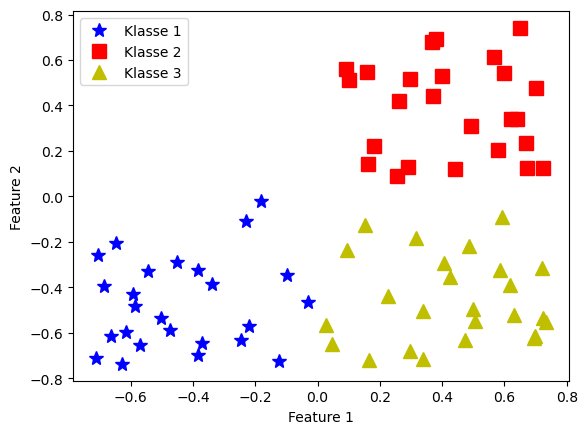

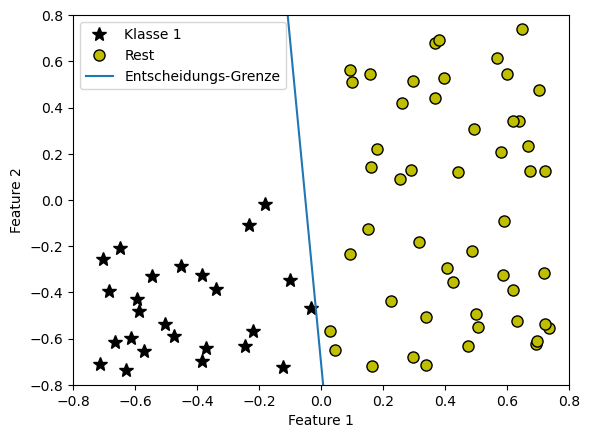

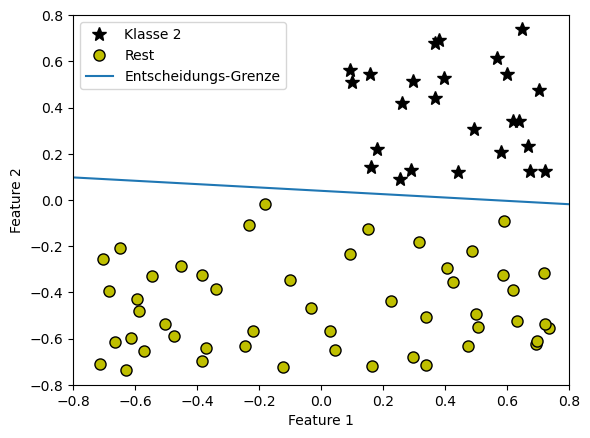

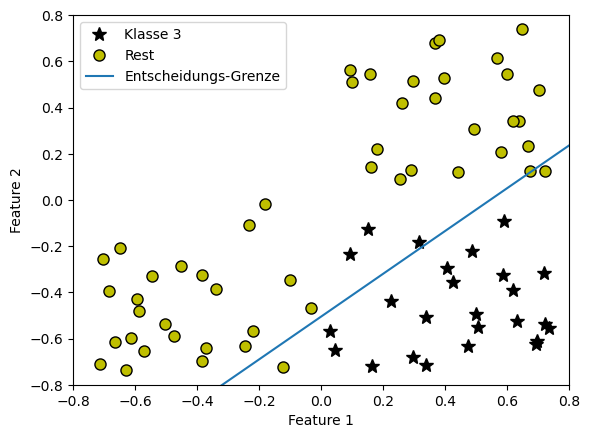

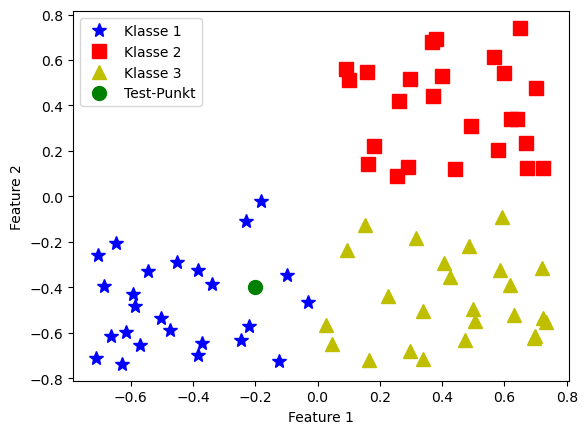

In [1]:
# Logistic Regression Methods


# IMPORT LIBRARIES------------------

import os # used for manipulating directory paths
import numpy as np # Scientific and vector computation for python
from scipy import optimize # Optimization module in scipy
from matplotlib import pyplot #plotting


# tells matplotlib to embed plots within the notebook
%matplotlib inline



def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : vector_like
        Label values for the dataset. A vector of size (M, ). 
     
    """
    # Create New Figure
    fig = pyplot.figure()
    
    # Find Indices of Positive and Negative Examples
    pos = y == 1
    neg = y == 0
    pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
    pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
    return
  
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        

    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    g= 1/(1+np.exp(-z))

    return g

def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : vector_like
        The parameters for logistic regression of shape (d+1,).
    
    X : array_like
        The input dataset of shape (m x d+1) where m is the total number
        of data points and d is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : vector_like
        Labels for the of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad :  vector_like
        A vector of shape (m+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    """
    
    # Initialize some useful values
    m = y.size  # number of training examples
    h = sigmoid(np.dot(X,theta))
    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    
    J = (-1/m)*np.sum(y*np.log(h)+(1-y)*np.log(1-h))
    grad = (1/m)*np.dot(X.T, (h-y))


    return J, grad

def one_hot_encode(y):
    """
    One-hot encodes an array of class labels.

    Parameters
    ----------
    y: array_like 
    Input array of class labels to be one-hot encoded.

    Returns
    -------
    y_encode: array_like
      One-hot encoded array, where each row corresponds to a data point
      and each column corresponds to a unique class. The value 1.0 at a specific position
      indicates the presence of that class for the corresponding data point.
    """
    # Determine the number of unique classes in the input array y.
    n_class = np.unique(y).shape[0]
    
    # Create an empty array with zeros, where each row corresponds to a data point
    # and each column corresponds to a unique class.
    y_encode = np.zeros((y.shape[0], n_class))
    
    # Iterate over each data point's index (idx) and its corresponding class (val) in y.
    for idx, val in enumerate(y):
        # Set the element in the y_encode array at the current index (idx) and 
        # corresponding class (val) to 1.0, indicating the presence of that class.
        y_encode[idx, val] = 1.0
    
    # Return the one-hot encoded array.
    return y_encode

def net_input(X, W, b):
    """
    Calculates the net input of a linear model.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x d+1) where m is the total number
        of data points and d is the number of features. 
    W : vector_like
        Weight vector representing the coefficients of the linear model.
    b: (float)
        Bias term, providing an additional offset to the weighted sum.

    Returns
    -------
    net_input_result: array_like
        Result of the net input, representing the weighted sum of the inputs
        plus the bias. Each element in the array corresponds to the net input for a
        specific data point.
    """
    # Calculate the dot product of the input data 'X' and the weights 'W'.
    # This step represents the weighted sum of the inputs.
    weighted_sum = X.dot(W)
    
    # Add the bias vector 'b' to the weighted sum.
    # This step introduces an additional offset to the weighted sum.
    net_input_result = weighted_sum + b
    
    # Return the final net input result.
    return net_input_result

def softmax(z):
    """
    Compute the softmax function for a given input array.

    Parameters
    ----------
    z : array_like 
        Input array containing real numbers for which the softmax is computed.

    Returns
    -------
    softmax_result: array_like
        An array of the same shape as input 'z', containing softmax probabilities.
    """
    # Calculate the exponential of each element in the input array z
    exp_z = np.exp(z)

    # Calculate the sum of exponentials for each row, forming a column vector
    sum_exp_z = np.sum(exp_z, axis=1, keepdims=True)

    # Divide each element in the exponential array by the corresponding sum
    # This scales the values to represent probabilities that sum to 1 for each row
    softmax_result = exp_z / sum_exp_z

    # Return the computed softmax probabilities
    return softmax_result

def cross_entropy_loss(params, X, y_true):
    
    """
    Calculates the cross-entropy loss and its gradient for a given set of parameters.

    Parameters
    ----------
    params : array_like 
        Concatenated array containing the weight matrix and bias vector.
    X : array_like
        The input dataset of shape (m x d+1) where m is the total number
        of data points and d is the number of features. 
    y_true : array_like 
        One-hot encoded true class labels for each data point.

    Returns
    -------
    loss: (float)
        Cross-entropy loss.
    grad : array_like 
        Gradient of the loss with respect to the parameters.
    """
    
    n_samples, d_features = X.shape
    k_classes = y_true.shape[1]
   
    # Extract weight matrix and bias vector from params
    W = params[:-k_classes].reshape(d_features, k_classes)
    b = params[-k_classes:]
    
    # Calculate net input (z)
    z = X.dot(W) + b
    
    # Calculate softmax probabilities
    y_pred = softmax(z)
    
    # Calculate the loss
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / n_samples
    
    # Calculate the gradient
    grad_loss = (y_pred - y_true) / n_samples
    grad_W = X.T.dot(grad_loss)
    grad_b = np.sum(grad_loss, axis=0, keepdims=True)
    
    # Flatten and concatenate the gradients
    grad = np.concatenate((grad_W.flatten(), grad_b.flatten()))
    
    return loss, grad

def batch_gradient_descent_softmax(params, X, y, alpha, num_iterations):
    
    """
    Performs batch gradient descent to optimize parameters for a softmax regression model.

    Parameters
    ----------
    params : array_like 
        Concatenated array containing the weight matrix and bias vector.
    X : array_like
        The input dataset of shape (m x d+1) where m is the total number
        of data points and d is the number of features. 
    y : array_like 
        One-hot encoded true class labels for each data point.
    alpha: float
        Learning rate, determining the size of the step in each iteration.
    num_iterations: int
        Number of iterations for the gradient descent optimization.

    Returns:
    params: array_like
        Optimized parameters after performing batch gradient descent.
    """
    # Perform gradient descent
    for i in range(num_iterations):
        # Compute loss and gradient
        loss, grad = cross_entropy_loss(params, X, y)

        # Update parameters using the gradient
        params -= alpha * grad

        # Print the loss at every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss}")

    return params

def plotDecisionBoundary(plotData, theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.
 
    Parameters
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : vector_like
        Parameters for logistic regression of shape (d+1, ).

    X : array_like
        The input dataset of shape (m x d+1) where m is the total number
        of data points and d is the number of features. 

    y : vector_like
        Vector of data labels of shape (m, ).
    """
    # make sure theta is a numpy array
    theta = np.array(theta)
    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:3], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        pyplot.plot(plot_x, plot_y)
        pyplot.xlim([-0.8, 0.8])
        pyplot.ylim([-0.8, 0.8])

    else:
        # Determine the range for the grid based on data points
        x_min, x_max = np.min(X[:, 1]), np.max(X[:, 1])
        y_min, y_max = np.min(X[:, 2]), np.max(X[:, 2])
        x_range = x_max - x_min
        y_range = y_max - y_min

        # Generate a grid range
        u = np.linspace(x_min - x_range * 0.1, x_max + x_range * 0.1, 50)
        v = np.linspace(y_min - y_range * 0.1, y_max + y_range * 0.1, 50)

        z = np.zeros((u.size, v.size))
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                theta_shape = theta.shape
                mapped_feature = mapFeature(np.array([[ui]]), np.array([[vj]]))

                z[i, j] = np.dot(mapped_feature, theta)

        z = z.T  # important to transpose z before calling contour

        # Plot z = 0
        pyplot.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        pyplot.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
 
# Test the Code

# BINARY BASED CLASSIFICATION   --------------------

#Load the data from the Textfile 'data3.txt'
# The first two columns contains the X values and the third column
# contains the label (y).
data = np.loadtxt(os.path.join('Data', 'data_mult.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

# Find Indices of the Groups for the data plot
class_1 = data[data[:, 2] == 1]
class_2 = data[data[:, 2] == 2]
class_3 = data[data[:, 2] == 3]

# Create the multiclass plot
fig = pyplot.figure()
pyplot.plot(class_1[:, 0], class_1[:, 1], 'b*', lw=2, ms=10, label='Klasse 1')
pyplot.plot(class_2[:, 0], class_2[:, 1], 'rs', lw=2, ms=10, label='Klasse 2')
pyplot.plot(class_3[:, 0], class_3[:, 1], 'y^', lw=2, ms=10, label='Klasse 3')
# Add labels and legend
pyplot.xlabel('Feature 1')
pyplot.ylabel('Feature 2')
pyplot.legend()
pyplot.savefig('data_multiclass.png')


#Feature Mapping for Classifier 1 vs Rest 
y_class1_1_vs_rest = np.where(y==1,1,0)
y_class2_1_vs_rest  = np.where(y==2,1,0)
y_class3_1_vs_rest  = np.where(y==3 ,1,0)

# Setup the data matrix appropriately and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

# Initialize fitting parameters
initial_theta = np.zeros(n+1)

# cost function and gradient for class 1
cost, grad = costFunction(initial_theta, X, y_class1_1_vs_rest)

# set options for optimize.minimize
options= {'maxiter': 400}
# see documention for scipy's optimize.minimize  for description about
# the different parameters
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y_class1_1_vs_rest),
                        jac=True,
                        method='TNC',
                        options=options)

cost = res.fun
# the optimized theta is in the x property
theta_class1_vs_rest = res.x

# cost function and gradient for class 2
cost, grad = costFunction(initial_theta, X, y_class2_1_vs_rest)

# set options for optimize.minimize
options= {'maxiter': 400}
# see documention for scipy's optimize.minimize  for description about
# the different parameters
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y_class2_1_vs_rest),
                        jac=True,
                        method='TNC',
                        options=options)

cost = res.fun
# the optimized theta is in the x property
theta_class2_vs_rest = res.x

# cost function and gradient for class 3
cost, grad = costFunction(initial_theta, X, y_class3_1_vs_rest)

# set options for optimize.minimize
options= {'maxiter': 400}
# see documention for scipy's optimize.minimize  for description about
# the different parameters
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y_class3_1_vs_rest),
                        jac=True,
                        method='TNC',
                        options=options)

cost = res.fun
# the optimized theta is in the x property
theta_class3_vs_rest = res.x

# Plot Boundary for class 1
plotDecisionBoundary(plotData, theta_class1_vs_rest, X, y_class1_1_vs_rest)
 # Legend
pyplot.legend(['Klasse 1', 'Rest', 'Entscheidungs-Grenze'])
pyplot.xlabel('Feature 1')
pyplot.ylabel('Feature 2')
pyplot.savefig('data1_1vr.png')

# Plot Boundary for class 3
plotDecisionBoundary(plotData, theta_class2_vs_rest, X, y_class2_1_vs_rest)
 # Legend
pyplot.legend(['Klasse 2', 'Rest', 'Entscheidungs-Grenze'])
pyplot.xlabel('Feature 1')
pyplot.ylabel('Feature 2')
pyplot.savefig('data2_1vr.png')


# Plot Boundary for class 3
plotDecisionBoundary(plotData, theta_class3_vs_rest, X, y_class3_1_vs_rest)
 # Legend
pyplot.legend(['Klasse 3', 'Rest', 'Entscheidungs-Grenze'])
pyplot.xlabel('Feature 1')
pyplot.ylabel('Feature 2')
pyplot.savefig('data3_1vr.png')


#  Predict probability for an example point [-0.2,-0.4 ]
example_point = np.array([1, -0.2, -0.4])
prob_class1 = sigmoid(np.dot(example_point, theta_class1_vs_rest))
prob_class2 = sigmoid(np.dot(example_point, theta_class2_vs_rest))
prob_class3 = sigmoid(np.dot(example_point, theta_class3_vs_rest))
print('For an example point at -0.4, -0.4 the score for class 1 is {:.3f}'.format(prob_class1))
print('For an example point at -0.4, -0.4 the score for class 2 is {:.3f}'.format(prob_class2))
print('For an example point at -0.4, -0.4 the score for class 3 is {:.3f}'.format(prob_class3))

# Create the multiclass plot with highlighted example 
fig = pyplot.figure()
pyplot.plot(class_1[:, 0], class_1[:, 1], 'b*', lw=2, ms=10, label='Klasse 1')
pyplot.plot(class_2[:, 0], class_2[:, 1], 'rs', lw=2, ms=10, label='Klasse 2')
pyplot.plot(class_3[:, 0], class_3[:, 1], 'y^', lw=2, ms=10, label='Klasse 3')
pyplot.plot(example_point[1], example_point[2], 'go', ms=10, label='Test-Punkt')
# Add labels and legend
pyplot.xlabel('Feature 1')
pyplot.ylabel('Feature 2')
pyplot.legend()
pyplot.savefig('data_multiclass_with_testpoint.png')

# SOFTMAX REGRESSION BASED CLASSIFICATION   --------------------
data = np.loadtxt(os.path.join('Data', 'data_mult.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]
# Make sure y values are integers
y = y.astype(int)

# Convert class labels to start from 0 ("General consistency" for Machine Learning tasks)
y -= y.min()

# number of features
d_features = 2
# number of classes
k_classes = 3

# Calculate a proper scaling factor
scale = np.sqrt(2 / (k_classes + d_features))

# Usually the theta parameters are split into a weight matrix and a bias vector.
# We will do the same here.

# Initialize the weight matrix with random values
weight_matrix = np.random.randn(d_features,k_classes ) * scale
#Initialize the bias term
bias = np.random.rand(k_classes) * 0.1

# Perform one-hot encoding on y
y_encoded = one_hot_encode(y)

initial_params = np.concatenate((weight_matrix.flatten(), bias.flatten()))

# SciPy Optimization
res = optimize.minimize(cross_entropy_loss,
                        initial_params,
                        args=(X, y_encoded),
                        jac=True,
                        method='TNC',
                        options=options)

# Extract the optimized parameters with scipy
optimal_params_scipy = res.x

optimal_weight_matrix_scipy = optimal_params_scipy[:d_features * k_classes].reshape((d_features, k_classes))
optimal_bias_scipy = optimal_params_scipy[-k_classes:].reshape((1, k_classes))

print("Optimized Weight Matrix SciPy:")
print(optimal_weight_matrix_scipy)
print("\nOptimized Bias SciPy:")
print(optimal_bias_scipy)
print("\nFinal Loss:", res.fun)

# Calculate the optimized parameters with batch gradient deccent
num_iterations = 100
alpha = 0.1
optimal_params_bgd = batch_gradient_descent_softmax(initial_params, X, y_encoded, alpha, num_iterations)

optimal_weight_matrix_bgd = optimal_params_bgd[:-k_classes].reshape(d_features, k_classes)
optimal_bias_bgd = optimal_params_bgd[-k_classes:]

print("Optimized Weight Matrix BGD:")
print(optimal_weight_matrix_bgd)
print("\nOptimized Bias BGD:")
print(optimal_bias_bgd)

# Calculate net input (z) for the example point
example_point = np.array([-0.2, -0.4])

# Calculate the net input (z) for the example point with scipy
z_scipy = np.dot(example_point, optimal_weight_matrix_scipy) + optimal_bias_scipy

# Calculate the net input (z) for the example point with BGD
z_bgd = np.dot(example_point, optimal_weight_matrix_bgd) + optimal_bias_bgd
z_bgd =  z_bgd.reshape((1, 3))

probabilities_scipy = softmax(z_scipy)
probabilities_bgd = softmax(z_bgd)
print("SciPy Probabilities:", probabilities_scipy)
print("BGD Probabilities:", probabilities_bgd)
